# Plot MAGICC temperatures

In [20]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [21]:
import os
import string

import dotenv
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scmdata.database
import seaborn as sns
from matplotlib.gridspec import GridSpec

import utils

<IPython.core.display.Javascript object>

In [22]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [23]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.framealpha"] = 0.7
plt.rcParams["legend.handleheight"] = 0.8
plt.rcParams["legend.handlelength"] = 2

<IPython.core.display.Javascript object>

In [24]:
MAGICC_QUANTILES_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "magicc-output",
    utils.MAGICC_RUN_ID,
    "magicc-output-quantiles.nc",
)
MAGICC_QUANTILES_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/magicc-output/7d7c42/magicc-output-quantiles.nc'

<IPython.core.display.Javascript object>

In [25]:
MAGICC_QUANTILES_BOX_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "magicc-output",
    utils.MAGICC_RUN_ID,
    "magicc-output-quantiles-for-box.csv",
)
MAGICC_QUANTILES_BOX_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/magicc-output/7d7c42/magicc-output-quantiles-for-box.csv'

<IPython.core.display.Javascript object>

In [26]:
gsat = scmdata.ScmRun.from_nc(MAGICC_QUANTILES_FILE).filter(
    variable="Surface Air Temperature Change"
)
tmp = utils.unmangle_scenario_name(gsat)
gsat = utils.mangle_scenario_name_from_updated_labelling(utils.update_labelling(tmp))

# drop out 2035 and UTS-delayed scenarios which aren't in paper
gsat = gsat.filter(scenario=["*default-2035*", "*delayed"], keep=False)

gsat

<ScmRun (timeseries: 240, timepoints: 401)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2150-01-01T00:00:00
Meta:
	     climate_model ecores_quantile         model  quantile region  \
	2     MAGICCv7.5.3            0.05  not_relevant      0.05  World   
	5     MAGICCv7.5.3            0.05  not_relevant      0.17  World   
	8     MAGICCv7.5.3            0.05  not_relevant      0.50  World   
	11    MAGICCv7.5.3            0.05  not_relevant      0.83  World   
	14    MAGICCv7.5.3            0.05  not_relevant      0.95  World   
	...            ...             ...           ...       ...    ...   
	1172  MAGICCv7.5.3     not_applied  not_relevant      0.05  World   
	1175  MAGICCv7.5.3     not_applied  not_relevant      0.17  World   
	1178  MAGICCv7.5.3     not_applied  not_relevant      0.50  World   
	1181  MAGICCv7.5.3     not_applied  not_relevant      0.83  World   
	1184  MAGICCv7.5.3     not_applied  not_relevant      0.95  World   
	
	                      scenario unit            

<IPython.core.display.Javascript object>

In [27]:
gsat.get_unique_meta("scenario")

['ECORES|default|IMA15-TOT',
 'ECORES|default|LED',
 'ECORES|default|UTS',
 'ECORES|default-2030|IMA15-TOT',
 'ECORES|default-2030|LED',
 'ECORES|default-2030|UTS',
 'ECORES|default-2040|IMA15-TOT',
 'ECORES|default-2040|LED',
 'ECORES|default-2040|UTS',
 'ECORES|default-2050|IMA15-TOT',
 'ECORES|default-2050|LED',
 'ECORES|default-2050|UTS']

<IPython.core.display.Javascript object>

In [28]:
gsat_box = pd.read_csv(MAGICC_QUANTILES_BOX_FILE)
tmp = utils.unmangle_scenario_name(gsat_box)
gsat_box = utils.mangle_scenario_name_from_updated_labelling(
    utils.update_labelling(tmp)
)
gsat_box

climate_model                        variable region  \
0    MAGICCv7.5.3  Surface Air Temperature Change  World   
1    MAGICCv7.5.3  Surface Air Temperature Change  World   
2    MAGICCv7.5.3  Surface Air Temperature Change  World   
3    MAGICCv7.5.3  Surface Air Temperature Change  World   
4    MAGICCv7.5.3  Surface Air Temperature Change  World   
..            ...                             ...    ...   
795  MAGICCv7.5.3  Surface Air Temperature Change  World   
796  MAGICCv7.5.3  Surface Air Temperature Change  World   
797  MAGICCv7.5.3  Surface Air Temperature Change  World   
798  MAGICCv7.5.3  Surface Air Temperature Change  World   
799  MAGICCv7.5.3  Surface Air Temperature Change  World   

                            scenario  reference_period_end_year         model  \
0           ECORES|default|IMA15-TOT                     1900.0  not_relevant   
1                 ECORES|default|LED                     1900.0  not_relevant   
2                 ECORES|default|UTS                     1900.0  not_relevant   
3         ECORES|default|UTS-delayed                     1900.0  not_relevant   
4           ECORES|default|IMA15-TOT                     1900.0  not_relevant   
..                               ...                        ...           ...   
795  ECORES|default-2050|UTS-delayed                     1900.0  not_relevant   
796    ECORES|default-2050|IMA15-TOT                     1900.0  not_relevant   
797          ECORES|default-2050|LED                     1900.0  not_relevant   
798          ECORES|default-2050|UTS                     1900.0  not_relevant   
799  ECORES|default-2050|UTS-delayed                     1900.0  not_relevant   

    unit  reference_period_start_year     value  quantile  \
0      K                       1850.0  1.163833      0.05   
1      K                       1850.0  1.210316      0.05   
2      K                       1850.0  1.188897      0.05   
3      K                       1850.0  1.231161      0.05   
4      K                       1850.0  1.156015      0.05   
..   ...                          ...       ...       ...   
795    K                       1850.0  1.834984      0.95   
796    K                       1850.0  2.060514      0.95   
797    K                       1850.0  2.322355      0.95   
798    K                       1850.0  2.156785      0.95   
799    K                       1850.0  2.226752      0.95   

     evaluation_period_start_year  evaluation_period_end_year ecores_quantile  
0                            2031                        2050            0.05  
1                            2031                        2050            0.05  
2                            2031                        2050            0.05  
3                            2031                        2050            0.05  
4                            2031                        2050             0.5  
..                            ...                         ...             ...  
795                          2081                        2100            0.95  
796                          2081                        2100     not_applied  
797                          2081                        2100     not_applied  
798                          2081                        2100     not_applied  
799                          2081                        2100     not_applied  

[800 rows x 13 columns]

<IPython.core.display.Javascript object>

['ECORES + default + IMA15-TOT' 'ECORES + default + LED'
 'ECORES + default + UTS']
['ECORES + default + IMA15-TOT' 'ECORES + default + LED'
 'ECORES + default + UTS']


'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../figures/magicc-temperatures-quantile-split.pdf'

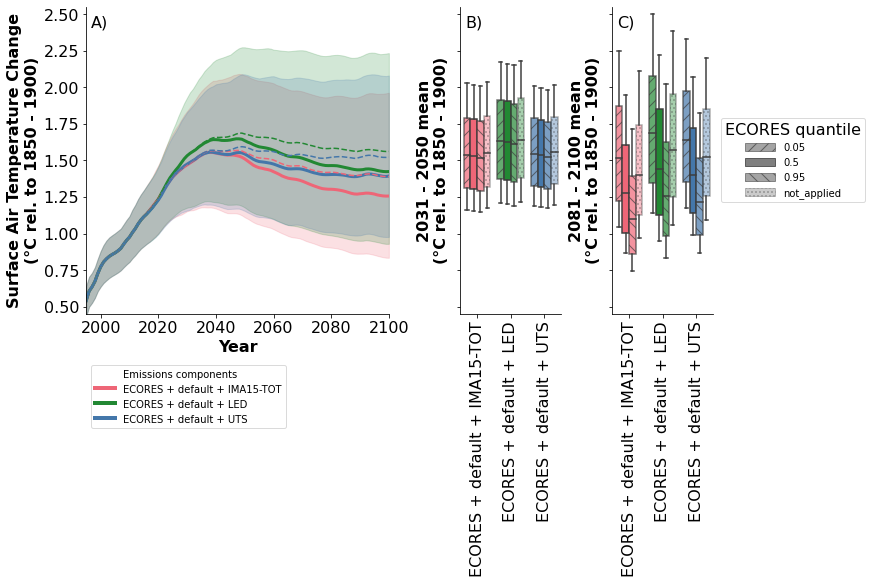

['ECORES + default + UTS' 'ECORES + default-2030 + UTS'
 'ECORES + default-2040 + UTS' 'ECORES + default-2050 + UTS']
['ECORES + default + UTS' 'ECORES + default-2030 + UTS'
 'ECORES + default-2040 + UTS' 'ECORES + default-2050 + UTS']


'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../figures/magicc-temperatures-deforest-split.pdf'

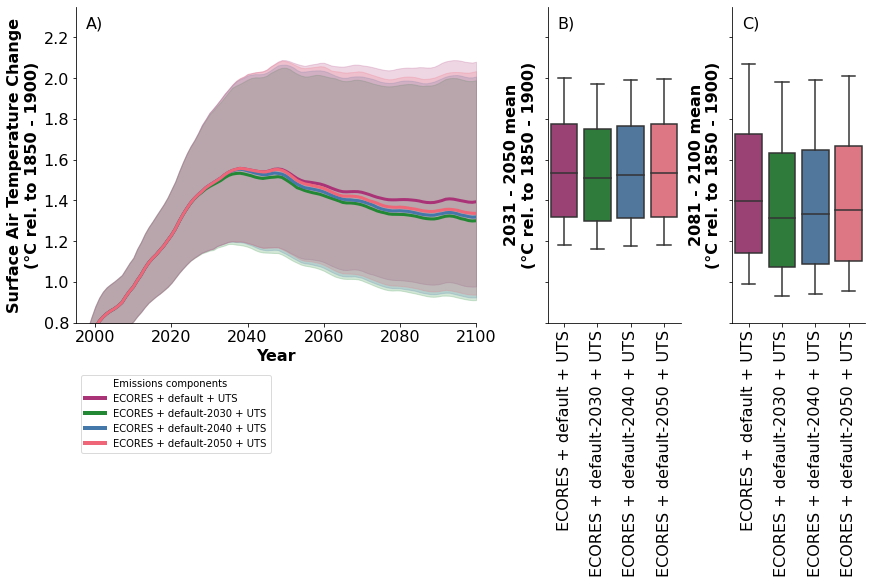

<IPython.core.display.Javascript object>

In [29]:
q_lower = 0.05
q_ll = 0.17
q_lu = 0.83
q_upper = 0.95


def get_label_quantile_split(s):
    bits = s.split("|")

    return f"{bits[0]} + {bits[1]} + {bits[2]}"


def get_label_deforestation_split(s):
    bits = s.split("|")

    return f"{bits[0]} + {bits[1]} + {bits[2]}"


for (
    name,
    sfilter,
    ecores_filter,
    ecores_filter_box,
    get_label,
    box_split,
    box_split_label,
    palette_helper,
    order,
    ylim,
    annotate_xycoords,
) in (
    (
        "quantile-split",
        ["*default|*"],
        "*",
        "*",
        #         ["0.05", "0.5", "0.95"],
        get_label_quantile_split,
        "ecores_quantile",
        "ECORES quantile",
        {
            "IMA15-TOT": "#EE6677",
            "LED": "#228833",
            #             "POLES": "tab:green",
            "UTS": "#4477AA",
        },
        [
            "ECORES + default + IMA15-TOT",
            "ECORES + default + LED",
            "ECORES + default + UTS",
        ],
        [0.45, 2.55],
        (5, 287),
    ),
    (
        "deforest-split",
        "*UTS",
        0.5,
        ["0.05", "0.5", "0.95"],
        get_label_deforestation_split,
        None,
        None,
        {
            "2030": "#228833",
            "2040": "#4477AA",
            "2050": "#EE6677",
            "default +": "#AA3377",
        },
        [
            "ECORES + default + UTS",
            "ECORES + default-2030 + UTS",
            "ECORES + default-2040 + UTS",
            "ECORES + default-2050 + UTS",
        ],
        [0.8, 2.35],
        (10, 295),
    ),
):
    pdf = gsat.filter(
        year=range(1995, 2100 + 1), scenario=sfilter, ecores_quantile=ecores_filter
    )

    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(1, 10, figure=fig)
    ax0 = fig.add_subplot(gs[0, :6])

    end_average_period_axes = (
        (range(2031, 2050 + 1), fig.add_subplot(gs[0, 6:8])),
        (range(2081, 2100 + 1), fig.add_subplot(gs[0, 8:])),
    )

    pdf["label"] = pdf["scenario"].apply(get_label)
    pdf["landuse_quantile"] = pdf["scenario"].apply(lambda x: x.split("|")[-3])
    pdf["landuse_baseline"] = pdf["scenario"].apply(lambda x: x.split("|")[2])

    palette = {}
    for l in pdf.get_unique_meta("label"):
        for k, v in palette_helper.items():
            if k in l:
                palette[l] = v

    assert pdf.get_unique_meta("unit", True) == "K"
    unit_label = "°C"
    y_unit = f"({unit_label} rel. to " f"1850 - 1900)"

    ax, lh = pdf.filter(ecores_quantile="0.5").plumeplot(
        quantile_over=("run_id",),
        hue_var="label",
        hue_label="Emissions components",
        palette=palette,
        linewidth=3,
        ax=ax0,
        quantiles_plumes=[((q_lower, q_upper), 0.2), ((0.5,), 1.0)],
        pre_calculated=True,
    )

    if "not_applied" in pdf.get_unique_meta("ecores_quantile"):
        pdf.filter(ecores_quantile="not_applied", quantile=0.5).lineplot(
            ax=ax, hue="label", palette=palette, linestyle="--", legend=False
        )
    #     ax.grid()
    leg = ax.legend(handles=lh[3:-2], loc="upper left", bbox_to_anchor=(0, -0.15))
    utils.set_legend_linewidths(leg, 4)
    ax.set_ylabel(f"{pdf.get_unique_meta('variable', True)}\n{y_unit}")
    ax.set_ylim(ylim)
    ax.set_xlabel("Year")

    utils.annotate_ax(
        ax,
        f"{string.ascii_uppercase[0]})",
        annotate_xycoords,
        "axes points",
    )
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    for j, (end_average_period, ax) in enumerate(end_average_period_axes):
        if box_split is not None:
            groups = ["label", box_split]
        else:
            groups = ["label"]

        end_averages = gsat_box[
            (gsat_box["evaluation_period_start_year"] == end_average_period[0])
            & (gsat_box["evaluation_period_end_year"] == end_average_period[-1])
            & (gsat_box["scenario"].isin(pdf.get_unique_meta("scenario")))
            & (
                gsat_box["ecores_quantile"]
                .astype(str)
                .isin(
                    pdf.filter(ecores_quantile=ecores_filter_box).get_unique_meta(
                        "ecores_quantile"
                    )
                )
            )
        ].copy()

        end_averages["label"] = end_averages["scenario"].apply(get_label)
        end_averages["landuse_quantile"] = end_averages["scenario"].apply(
            lambda x: x.split("|")[-3]
        )
        end_averages["landuse_baseline"] = end_averages["scenario"].apply(
            lambda x: x.split("|")[2]
        )

        end_averages = end_averages.set_index(
            list(set(end_averages.columns) - {"value"})
        )

        lower_box = end_averages[
            end_averages.index.get_level_values("quantile") == q_lower
        ]["value"]
        ll_box = end_averages[end_averages.index.get_level_values("quantile") == q_ll][
            "value"
        ]
        lu_box = end_averages[end_averages.index.get_level_values("quantile") == q_lu][
            "value"
        ]
        upper_box = end_averages[
            end_averages.index.get_level_values("quantile") == q_upper
        ]["value"]
        median_box = end_averages[
            end_averages.index.get_level_values("quantile") == 0.5
        ]["value"]

        value_label = "{} - {} mean".format(
            end_average_period[0], end_average_period[-1]
        )

        box_df = []
        for i in range(101):
            if i < 20:
                to_append = lower_box.copy()
            elif i < 50:
                to_append = ll_box.copy()
            elif i == 50:
                to_append = median_box.copy()
            elif i < 80:
                to_append = lu_box.copy()
            else:
                to_append = upper_box.copy()

            to_append = to_append.to_frame()
            to_append["draw"] = i

            box_df.append(to_append)

        box_df = pd.concat(box_df, axis=0).reset_index()
        box_df = box_df.rename({"value": value_label}, axis="columns")
        print(box_df["label"].unique())

        pkwargs = {}
        if box_split is None:
            pkwargs["palette"] = palette

        ax = sns.boxplot(
            data=box_df,
            x="label",
            y=value_label,
            hue=box_split,
            ax=ax,
            order=order,
            **pkwargs,
        )

        xvals = ax.get_xticks()
        xlabels = [v.get_text() for v in ax.get_xticklabels()]

        if box_split is not None:
            lower_alpha = 0.7
            lower_hatch = "//"
            median_alpha = 1
            upper_alpha = 0.7
            upper_hatch = "\\\\"
            not_applied_alpha = 0.4
            not_applied_hatch = "..."

            for v in ax.get_children():
                if v.get_label() == "0.05":
                    lower_colour = v.get_facecolor()
                    v.set_facecolor("tab:gray")
                    v.set_hatch(lower_hatch)
                    v.set_alpha(lower_alpha)
                elif v.get_label() == "0.5":
                    median_colour = v.get_facecolor()
                    v.set_facecolor("tab:gray")
                elif v.get_label() == "0.95":
                    upper_colour = v.get_facecolor()
                    v.set_facecolor("tab:gray")
                    v.set_alpha(upper_alpha)
                    v.set_hatch(upper_hatch)
                elif v.get_label() == "not_applied":
                    not_applied_colour = v.get_facecolor()
                    v.set_facecolor("tab:gray")
                    v.set_alpha(not_applied_alpha)
                    v.set_hatch(not_applied_hatch)

            for v in ax.get_children():
                if isinstance(v, mpatches.PathPatch):
                    current_colour = v.get_facecolor()

                    x_spot = np.round(v.get_path().vertices[0][0], 0)
                    x_index = np.where(xvals == x_spot)[0][0]
                    label = xlabels[x_index]
                    v.set_facecolor(palette[label])
                    if current_colour == lower_colour:
                        v.set_hatch(lower_hatch)
                        v.set_alpha(lower_alpha)
                    elif current_colour == upper_colour:
                        v.set_hatch(upper_hatch)
                        v.set_alpha(upper_alpha)
                    elif current_colour == not_applied_colour:
                        v.set_hatch(not_applied_hatch)
                        v.set_alpha(not_applied_alpha)

        ax.set_xticklabels(xlabels, rotation=90)

        if j < len(end_average_period_axes) - 1:
            if box_split is not None:
                ax.legend().remove()
        else:
            if box_split is not None:
                ax.legend(
                    title=box_split_label,
                    loc="center left",
                    bbox_to_anchor=(1.03, 0.5),
                    handlelength=3,
                )

        ax.set_yticklabels([])
        ax.set_ylabel(f"{value_label}\n{y_unit}")
        ax.set_xlabel("")
        ax.set_ylim(ylim)
        utils.annotate_ax(
            ax,
            f"{string.ascii_uppercase[j + 1]})",
            annotate_xycoords,
            "axes points",
        )
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

    out_file_figure_name = f"magicc-temperatures-{name}.pdf"
    out_file_figure = os.path.join(utils.FIGURES_DIR, out_file_figure_name)
    os.makedirs(os.path.dirname(out_file_figure), exist_ok=True)
    display(out_file_figure)
    plt.savefig(out_file_figure, transparent=True)

    plt.show()
#     break